# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will analyze the no-show appointments dataset and find out the important factors for us to predict if a patient will show up for their scheduled appointment.

In [4]:
#import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
### Data Wrangling

In [5]:
# Load the data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# How many samples in this data?
print(df.shape)

(110527, 14)


There are 110527 samples, and 14 columns.

In [7]:
# Inspecting Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Result shows all 14 data columns have 110527 entries, which means non of the columns has null values. 

In [8]:
# print number of duplicates in dataset
df.duplicated().sum()

0

There is no duplicated row.

### Data Cleaning : Fixing ScheduledDay and AppointmentDay Data Type (convert object to daytime)

In [9]:
# Fixing ScheduledDay Data Type: convert object to daytime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [10]:
# Fixing AppointmentDay Data Type: convert object to daytime
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [11]:
# Check if ScheduledDay and AppointmentDay Data Type are fixed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


## Research Question 1  : How many percentage of the patients will show up for the appointment?

In [22]:
# Create two new colums - "No-show count" and "Show count". 
def no_show_count(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
def show_count(y):
    if y =="No":
        return 1
    else: 
        return 0
    
df['No-show count'] = df['No-show'].apply(no_show_count)
df['Show count'] = df['No-show'].apply(show_count)

print(df.head())


      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  No-show count  Show count  
0        0  

In [23]:
# Calculate the percentage of No-show patients and the percentage of Show patients.
Total_no_show = df['No-show count'].sum()
Total_show = df['Show count'].sum()
Total_pt = df['No-show count'].count()
percentage_noshow_pt = Total_no_show/Total_pt
percentage_show_pt = Total_show/Total_pt
print(percentage_noshow_pt)
print(percentage_show_pt)

0.20193255946510807
0.798067440534892


In [17]:
Total_pt = df['No-show count'].count()
Total_pt

110527

20.19% of the patients will miss the appointments, and 79.81% of the patients will show up for the appointments.

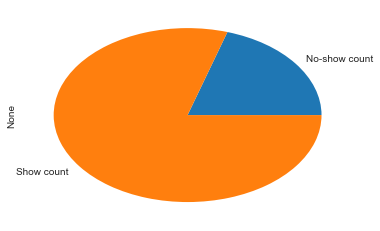

In [40]:
# Create a pie chart to show the percentage of no-show patients and show patients
df.iloc[:, -2:].sum().plot(kind='pie')

## Research Question 2  : Will scheduled day and appointment day affect the show up rate?

In [35]:
# Create a new colum 'days_change' to calculate the time change between scheduled day 
# and appointment day
df['days_change']=df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No-show counts,days_change
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0 days


In [212]:
# Let's get all the female patients in datasets, then count the value for show and no-show.
sameday_df = df.query('days_change=="0 days"')
sameday_pt = sameday_df['No-show'].value_counts()
Total_sameday_pt = sameday_df['No-show'].count()
Proportion_sameday_df = sameday_pt/Total_sameday_pt
Proportion_sameday_df

No     0.953531
Yes    0.046469
Name: No-show, dtype: float64

In [215]:
# Let's get all the female patients in datasets, then count the value for show and no-show.
diffday_df = df.query('days_change!="0 days"')
diffday_pt = diffday_df['No-show'].value_counts()
Total_diffday_pt = diffday_df['No-show'].count()
Proportion_diffday_df = diffday_pt/Total_diffday_pt
Proportion_diffday_df

No     0.71476
Yes    0.28524
Name: No-show, dtype: float64

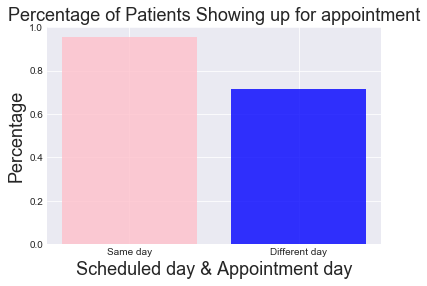

In [216]:
plt.bar(["Same day", "Different day"], [Proportion_sameday_df[0], Proportion_diffday_df[0]], color =['pink','blue'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Scheduled day & Appointment day", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

The charts shows that if patient's scheduled day and appointment day are at the same day, 95.35% of the patients will show up for the appointments. But if patient's scheduled day and appointment day are at the different day, only 71.48% of the patients will show up for the appointment. Since 23.87% difference is pretty significant, we can conclude that if patient's scheduled day and appointment day are at the same day, they will most likely show up for their appointments.

## Research Question 3  : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Gender

In [195]:
# Let's get all the female patients in datasets, then count the value for show and no-show.
F_df = df.query('Gender=="F"')
F_pt = F_df['No-show'].value_counts()
Total_F_pt = F_df['No-show'].count()
Proportion_F_df = F_pt/Total_F_pt
Proportion_F_df

No     0.796854
Yes    0.203146
Name: No-show, dtype: float64

In [196]:
# Let's get all the male patients in datasets, then count the value for show and no-show.
M_df = df.query('Gender=="M"')
M_pt = M_df['No-show'].value_counts()
Total_M_pt = M_df['No-show'].count()
Proportion_M_df = M_pt/Total_M_pt
Proportion_M_df

No     0.800321
Yes    0.199679
Name: No-show, dtype: float64

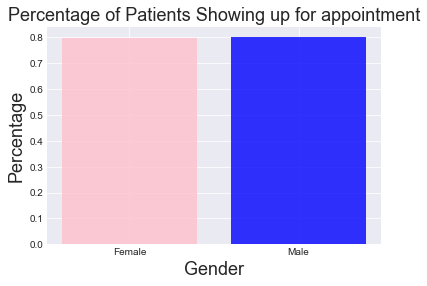

In [258]:
plt.bar(["Female", "Male"], [Proportion_F_df[0], Proportion_M_df[0]], color =['pink','blue'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Gender", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

According to the result, Female has 79.68% rate of showing up on appointments, and male has 80.03% rate. However, 0.35% is not a significant difference, we can say that gender is not a factor to predict if a patient will show up for their scheduled appointment.

### Scholarship (Bolsa Damilia)

In [169]:
# First, let's get all the Scholarship patients in datasets, 
#and then count the value for show and no-show.
SS_df = df.query('Scholarship==1')
SS_pt = SS_df['No-show'].value_counts()
Total_SS_pt = SS_df['No-show'].count()
Proportion_SS_df = SS_pt/Total_SS_pt
Proportion_SS_df

No     0.762637
Yes    0.237363
Name: No-show, dtype: float64

In [171]:
# Second, let's get all the non-Scholarship patients in datasets, 
#and then count the value for show and no-show.
NonSS_df = df.query('Scholarship==0')
NonSS_pt = NonSS_df['No-show'].value_counts()
Total_NonSS_pt = NonSS_df['No-show'].count()
Proportion_NonSS_df = NonSS_pt/Total_NonSS_pt
Proportion_NonSS_df

No     0.801928
Yes    0.198072
Name: No-show, dtype: float64

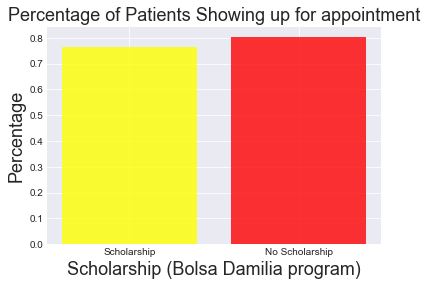

In [259]:
plt.bar(["Scholarship", "No Scholarship"], [Proportion_SS_df[0], Proportion_NonSS_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Scholarship (Bolsa Damilia program)", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

76.26% of patients with Brasilian welfare program Bolsa Família will show up for the appointments, and 80.19% of patients without Brasilian welfare program Bolsa Família will show up for the appointments. However, 3.9% is not a significant difference, we can say that scholarship is not a factor to predict if a patient will show up for their scheduled appointment.

### Hipertension pateints 

In [163]:
# First, let's get all the Hipertension patients in datasets, 
#and then count the value for show and no-show.
HTN_df = df.query('Hipertension==1')
HTN_pt = HTN_df['No-show'].value_counts()
Total_HTN_pt = HTN_df['No-show'].count()
Proportion_HTN_df = HTN_pt/Total_HTN_pt
Proportion_HTN_df

No     0.82698
Yes    0.17302
Name: No-show, dtype: float64

In [164]:
# Second, let's get all the non-Hipertension patients in datasets, 
#and then count the value for show and no-show.
NonHTN_df = df.query('Hipertension==0')
NonHTN_pt = NonHTN_df['No-show'].value_counts()
Total_NonHTN_pt = NonHTN_df['No-show'].count()
Proportion_NonHTN_df = NonHTN_pt/Total_NonHTN_pt
Proportion_NonHTN_df

No     0.790963
Yes    0.209037
Name: No-show, dtype: float64

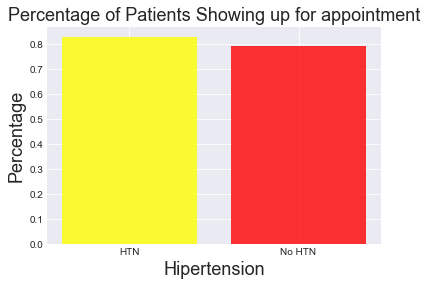

In [260]:
plt.bar(["HTN", "No HTN"], [Proportion_HTN_df[0], Proportion_NonHTN_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Hipertension", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

82.69% of the hypertension patients will show up for appointment, and 79.09% of the non-hypertension patients will show up for appointment. However, 3.6% is not a significant difference, we can say that Hipertension is not a factor to predict if a patient will show up for their scheduled appointment.

### Diabetes patients

In [180]:
#Let's get all the Diabetes patients in datasets,and then count the value for show and no-show.
DM_df = df.query('Diabetes==1')
DM_pt = DM_df['No-show'].value_counts()
Total_DM_pt = DM_df['No-show'].count()
Proportion_DM_df = DM_pt/Total_DM_pt
Proportion_DM_df

No     0.819967
Yes    0.180033
Name: No-show, dtype: float64

In [181]:
#Let's get all the Non-Diabetes patients in datasets,and then count the value for show and no-show.
NonDM_df = df.query('Diabetes==0')
NonDM_pt = NonDM_df['No-show'].value_counts()
Total_NonDM_pt = NonDM_df['No-show'].count()
Proportion_NonDM_df = NonDM_pt/Total_NonDM_pt
Proportion_NonDM_df

No     0.796372
Yes    0.203628
Name: No-show, dtype: float64

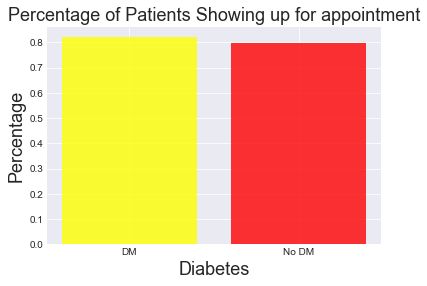

In [261]:
plt.bar(["DM", "No DM"], [Proportion_DM_df[0], Proportion_NonDM_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Diabetes", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

81.99% of the diabetes patients will show up for appointment, and 79.63% of the non-diabetes patients will show up for appointment. However, 2.36% is not a significant difference, we can say that Diabetes is not a factor to predict if a patient will show up for their scheduled appointment.

### Alcoholism patients

In [183]:
#Let's get all the Alcoholism patients in datasets,and then count the value for show and no-show.
Alcoholism_df = df.query('Alcoholism==1')
Alcoholism_pt = Alcoholism_df['No-show'].value_counts()
Total_Alcoholism_pt = Alcoholism_df['No-show'].count()
Proportion_Alcoholism_df = Alcoholism_pt/Total_Alcoholism_pt
Proportion_Alcoholism_df

No     0.798512
Yes    0.201488
Name: No-show, dtype: float64

In [184]:
#Let's get all the Non-Alcoholism patients in datasets,and then count the value for show and no-show.
NonAlcoholism_df = df.query('Alcoholism==0')
NonAlcoholism_pt = NonAlcoholism_df['No-show'].value_counts()
Total_NonAlcoholism_pt = NonAlcoholism_df['No-show'].count()
Proportion_NonAlcoholism_df = NonAlcoholism_pt/Total_NonAlcoholism_pt
Proportion_NonAlcoholism_df

No     0.798054
Yes    0.201946
Name: No-show, dtype: float64

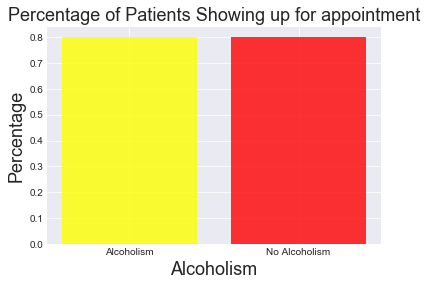

In [262]:
plt.bar(["Alcoholism", "No Alcoholism"], [Proportion_Alcoholism_df[0], Proportion_NonAlcoholism_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Alcoholism", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

79.85% of the alcoholism patients will show up for appointment, and 79.81% of the non-alcoholism patients will show up for appointment. However, 0.04% is not a significant difference, we can say that alcoholism is not a factor to predict if a patient will show up for their scheduled appointment.

### Handicapped patients

In [186]:
#Let's get all the Handicap patients in datasets,and then count the value for show and no-show.
HC_df = df.query('Handcap==1')
HC_pt = HC_df['No-show'].value_counts()
Total_HC_pt = HC_df['No-show'].count()
Proportion_HC_df = HC_pt/Total_HC_pt
Proportion_HC_df

No     0.820764
Yes    0.179236
Name: No-show, dtype: float64

In [187]:
#Let's get all the Non-Handicap patients in datasets,and then count the value for show and no-show.
NonHC_df = df.query('Handcap==0')
NonHC_pt = NonHC_df['No-show'].value_counts()
Total_NonHC_pt = NonHC_df['No-show'].count()
Proportion_NonHC_df = NonHC_pt/Total_NonHC_pt
Proportion_NonHC_df

No     0.797647
Yes    0.202353
Name: No-show, dtype: float64

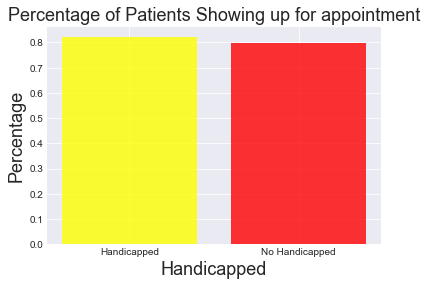

In [263]:
plt.bar(["Handicapped", "No Handicapped"], [Proportion_HC_df[0], Proportion_NonHC_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Handicapped", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

82.07% of the handicapped patients will show up for appointment, and 79.76% of the non-handicapped patients will show up for appointment. However, 2.31% is not a significant difference, we can say that Handicapped is not a factor to predict if a patient will show up for their scheduled appointment.

### SMS_received patients

In [189]:
#Let's get all the SMS-received patients in datasets,and then count the value for show and no-show.
SMS_df = df.query('SMS_received==1')
SMS_pt = SMS_df['No-show'].value_counts()
Total_SMS_pt = SMS_df['No-show'].count()
Proportion_SMS_df = SMS_pt/Total_SMS_pt
Proportion_SMS_df

No     0.724255
Yes    0.275745
Name: No-show, dtype: float64

In [190]:
#Let's get all the SMS-received patients in datasets,and then count the value for show and no-show.
NonSMS_df = df.query('SMS_received==0')
NonSMS_pt = NonSMS_df['No-show'].value_counts()
Total_NonSMS_pt = NonSMS_df['No-show'].count()
Proportion_NonSMS_df = NonSMS_pt/Total_NonSMS_pt
Proportion_NonSMS_df

No     0.832967
Yes    0.167033
Name: No-show, dtype: float64

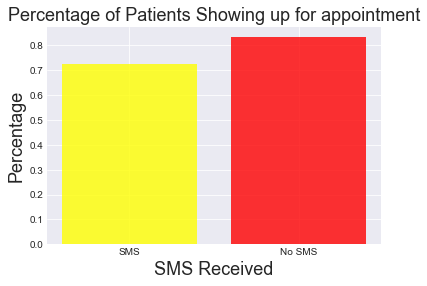

In [264]:
plt.bar(["SMS", "No SMS"], [Proportion_SMS_df[0], Proportion_NonSMS_df[0]], color =['yellow','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("SMS Received", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

72.43% of the SMS_received patients will show up for appointments, and 83% of the non-SMS received patients will show up for appointments. 10.66% difference is considered a significant difference. We can conclude that SMS received might be a factor to predict if a patient will show up for their scheduled appointment. Patient received no message has higher rate of showing up for appointments.

### Research Question 4  : Does age affect show-up rate?

In [247]:
# Let's categorize age column into 3 groups: adult, child, elderly
# And then count the no-show counts for each age group
def convert_age(age):
    if age >=65:
        return 'elderly'
    elif age>=18:
        return 'adult'
    else:
        return 'child'
    
df['Age_category']=df['Age'].apply(convert_age)
Age_cat = df.groupby('Age_category')['No-show'].value_counts()
Age_cat

Age_category  No-show
adult         No         54656
              Yes        14089
child         No         21383
              Yes         5997
elderly       No         12169
              Yes         2233
Name: No-show, dtype: int64

In [238]:
# Calculate total patients in each age group
Total_Age_pt = df.groupby('Age_category')['No-show'].count()
Total_Age_pt

Age_category
adult      68745
child      27380
elderly    14402
Name: No-show, dtype: int64

In [241]:
# Calculate the percentage of no-show patients in each age group
Proportion_Age_cat_df = Age_cat/Total_Age_pt
Proportion_Age_cat_df

Age_category  No-show
adult         No         0.795054
              Yes        0.204946
child         No         0.780972
              Yes        0.219028
elderly       No         0.844952
              Yes        0.155048
Name: No-show, dtype: float64

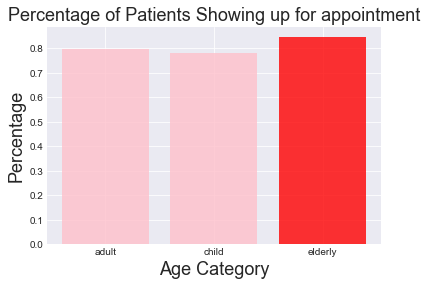

In [265]:
plt.bar(["adult", "child","elderly"], [Proportion_Age_cat_df[0], Proportion_Age_cat_df[2],Proportion_Age_cat_df[4]], color =['pink','pink','red'],alpha=0.8)
plt.title("Percentage of Patients Showing up for appointment", fontsize=18)
plt.xlabel("Age Category", fontsize=18)
plt.ylabel("Percentage", fontsize=18);

If we categorize all the ages into 3 different groups: adult(age >=18 and <65), child(age <18) and elderly(age>65), we can see that elderly has higher rate (84.49%) of showing up for appointment than the other two groups: child (78.09%) and adult (79.51%).

<a id='conclusions'></a>
## Conclusions

A. Of all the patients, 20.19% of the patients will likely miss the appointments, and 79.81% of the patients will likely show up for the appointments.

B. If patient's scheduled day and appointment day are at the same day, they will more likely show up for their appointments. 

C. Gender, scholarship, hipertension, diabetes, alcoholism, handicapped are not important factors to predict if a patient will show up for their scheduled appointment. 72.43% of the SMS_received patients will show up for appointments, and 83% of the non-SMS received patients will show up for appointments. Therefore, we can conclude that patient received no message has higher rate of showing up for appointments.

D. Elderly (age >=65 years old) has higher rate (84.49%) of showing up for appointment than the other two groups: child (78.09%) and adult (79.51%).